In [46]:
import os
from tqdm.notebook import trange, tqdm
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from dipy.viz import regtools
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show
from sklearn.decomposition import FastICA, PCA

from nilearn import datasets
from nilearn.maskers import NiftiMasker
from scipy.stats import zscore
from scipy.io import loadmat
from tensorly.decomposition import parafac
from IPython.display import Image

save_results = 'results/'
if not os.path.exists(save_results):
    os.makedirs(save_results)
    
%matplotlib inline

In [3]:
rest_dataset = datasets.fetch_development_fmri(n_subjects=60)
func_filenames = rest_dataset.func

 ...done. (2 seconds, 0 min)


Downloaded 5783552 of 5919127 bytes (97.7%,    0.2s remaining) ...done. (12 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 5046272 of 5642114 bytes (89.4%,    1.0s remaining) ...done. (11 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 5996544 of 6081959 bytes (98.6%,    0.1s remaining) ...done. (12 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5423104 of 5880763 bytes (92.2%,    0.8s remaining) ...done. (12 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5963776 of 6432694 bytes (92.7%,    1.4s remaining) ...done. (20 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 5275648 of 5606383 bytes (94.1%,    0.6s remaining) ...done. (12 seconds, 0 min)


 ...done. (4 seconds, 0 min)


Downloaded 4800512 of 6274191 bytes (76.5%,    0.6s remaining) ...done. (6 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 5472256 of 6123172 bytes (89.4%,    1.6s remaining) ...done. (17 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 6053888 of 6203305 bytes (97.6%,    0.5s remaining) ...done. (22 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 6094848 of 6253721 bytes (97.5%,    0.5s remaining) ...done. (22 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 4882432 of 6168810 bytes (79.1%,    3.2s remaining) ...done. (16 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5980160 of 6287468 bytes (95.1%,    0.6s remaining) ...done. (16 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 6070272 of 6146235 bytes (98.8%,    0.2s remaining) ...done. (18 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 6094848 of 6358784 bytes (95.8%,    0.6s remaining) ...done. (17 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 6127616 of 6199206 bytes (98.8%,    0.2s remaining) ...done. (20 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5947392 of 6249029 bytes (95.2%,    0.8s remaining) ...done. (19 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 5668864 of 5741735 bytes (98.7%,    0.2s remaining) ...done. (20 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5685248 of 5950135 bytes (95.5%,    0.2s remaining) ...done. (8 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5029888 of 5967515 bytes (84.3%,    0.7s remaining) ...done. (7 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 4784128 of 5527830 bytes (86.5%,    1.1s remaining) ...done. (10 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 5341184 of 5894024 bytes (90.6%,    1.1s remaining) ...done. (14 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 6053888 of 6131100 bytes (98.7%,    0.2s remaining) ...done. (16 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 4276224 of 5344522 bytes (80.0%,    0.8s remaining) ...done. (7 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 6029312 of 6235792 bytes (96.7%,    0.6s remaining) ...done. (22 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 3555328 of 5622722 bytes (63.2%,    1.2s remaining) ...done. (5 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5734400 of 5926863 bytes (96.8%,    0.2s remaining) ...done. (9 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 5529600 of 5552738 bytes (99.6%,    0.1s remaining) ...done. (26 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5816320 of 6178036 bytes (94.1%,    0.9s remaining) ...done. (18 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 5226496 of 5978758 bytes (87.4%,    1.5s remaining) ...done. (14 seconds, 0 min)


 ...done. (12 seconds, 0 min)


Downloaded 4866048 of 5920556 bytes (82.2%,    1.4s remaining) ...done. (11 seconds, 0 min)


In [7]:
for i in func_filenames:
    print(i)
    
print(len(func_filenames))

/home/julian/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
/home/julian/nilearn_data/development_fmri/development_fmri/sub-pixar124_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
/home/julian/nilearn_data/development_fmri/development_fmri/sub-pixar125_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
/home/julian/nilearn_data/development_fmri/development_fmri/sub-pixar126_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
/home/julian/nilearn_data/development_fmri/development_fmri/sub-pixar127_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
/home/julian/nilearn_data/development_fmri/development_fmri/sub-pixar128_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
/home/julian/nilearn_data/development_fmri/development_fmri/sub-pixar129_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
/home/julian/nilearn_data/development_fmri/development_

In [11]:
icbms = datasets.fetch_icbm152_2009()
masker = NiftiMasker(mask_img=icbms.mask)

# ICA across all participants

Loading data matrix X

In [48]:
im_ex = nib.load(func_filenames[0])
affine = nib.load(func_filenames[0]).affine

x, y, z, nb_vol = im_ex.shape

nb_subj = 60

X = np.zeros((nb_vol*nb_subj,x*y*z))

pos1 = 0
pos2 = nb_vol

for i in range(nb_subj):
    
    im = nib.load(func_filenames[i])
    im = im.get_fdata().copy()
    im = im.reshape(-1, nb_vol)

    X[pos1:pos2, :] = im.T
    
    pos1 = pos1 + nb_vol
    pos2 = pos2 + nb_vol
    
X = zscore(X, axis = 1) # across subjects
X = np.nan_to_num(X,0) # nan to 0s

ICA with 5, 10 and 20 components (code from lab 6 correction)

In [49]:
#* Run FastICA on X -- check 

S_dict = {}

nb_components =  [5,10,20]

#* We will transpose the matrix X so that ICA algorithm operates on the voxels dimension.
#* In other words, the estimated sources (S) should be have dimensionality [#voxels]

for n in nb_components:
    # run PCA as a preprocessing step for ICA with twice the number of components
    n2=2*n
    pca = PCA(n_components=n2)
    H = pca.fit_transform(X.T)  # Reconstruct signals based on orthogonal components
    
    ica = FastICA(n_components=n, random_state=1, max_iter=200)
    S_ = ica.fit_transform(H)  # Get the estimated sources (S)
    W_ = ica.components_ # Get the estimated un-mixing matrix (W) -- will not be used further on
    S_dict[n] = S_ # store the results in a dictionary


/home/julian/miniconda3/envs/NX-421/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/julian/miniconda3/envs/NX-421/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/julian/miniconda3/envs/NX-421/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Plotting ICA components in cases of 5, 10 and 20 components (code from lab 6 corrections)

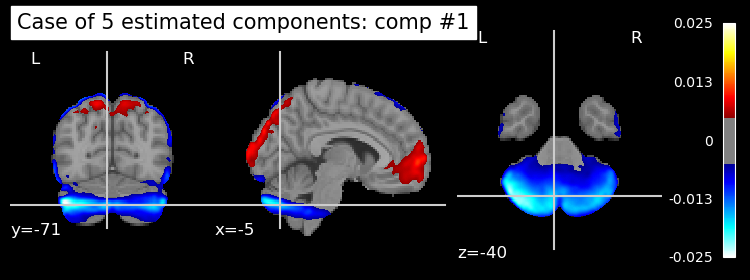

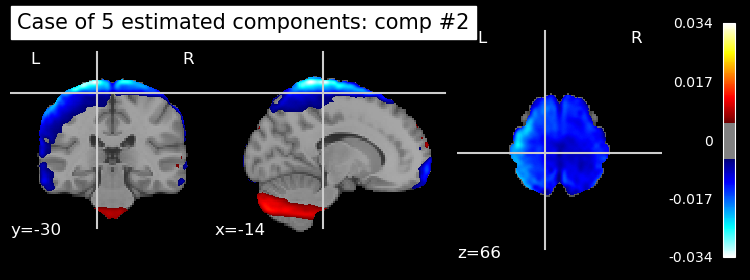

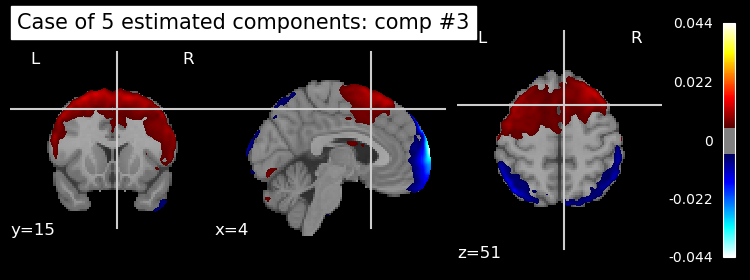

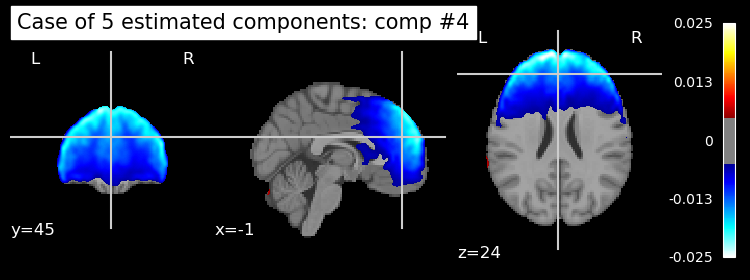

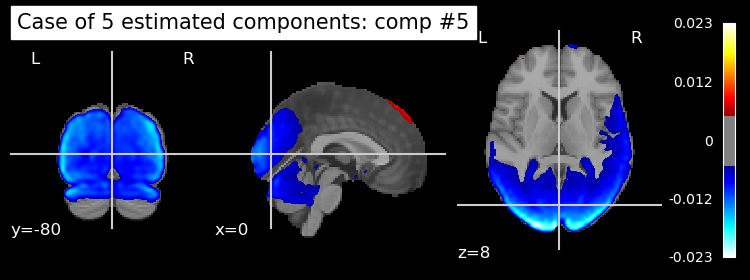

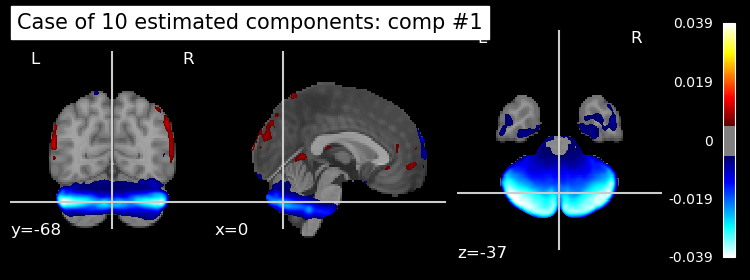

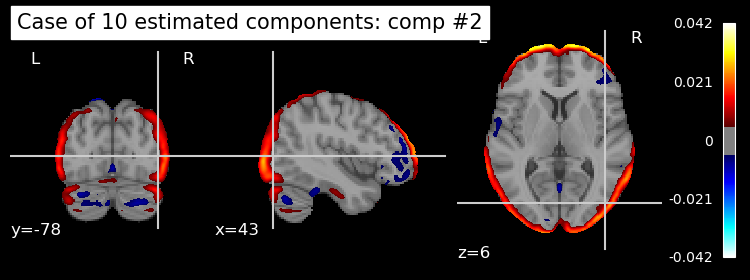

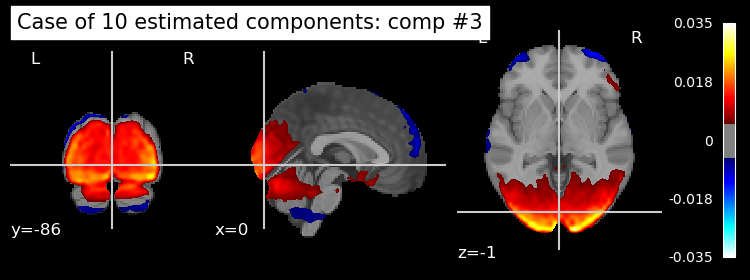

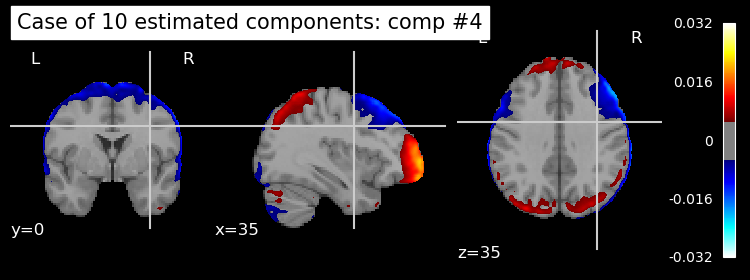

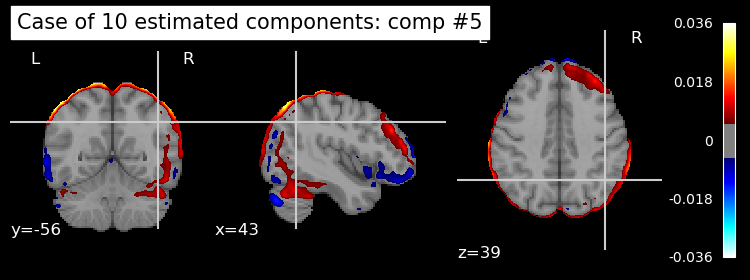

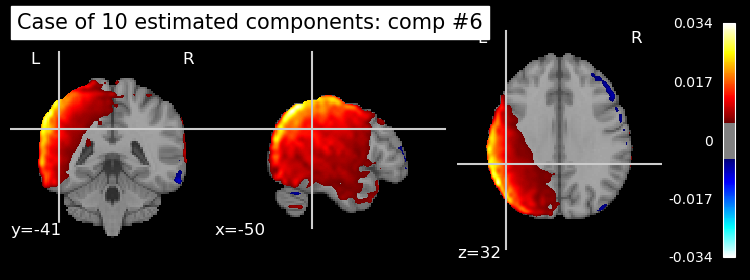

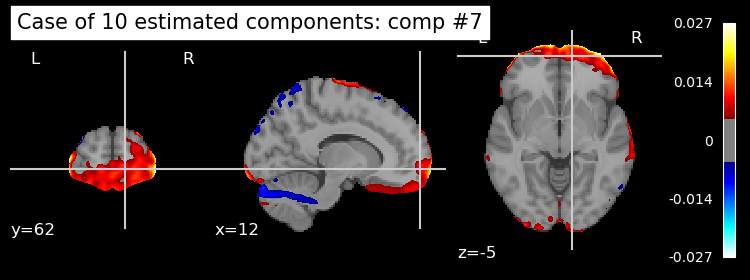

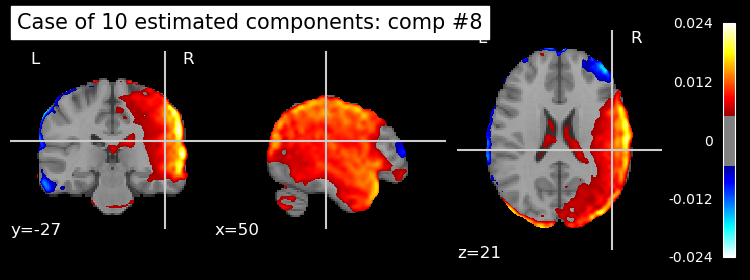

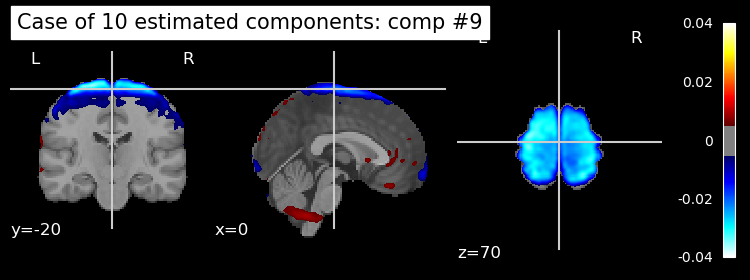

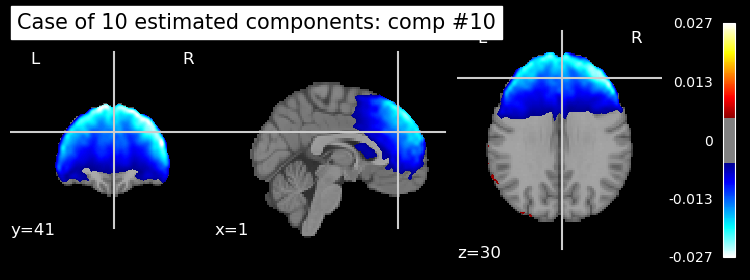

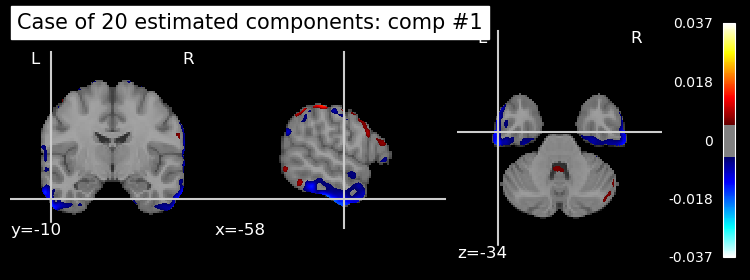

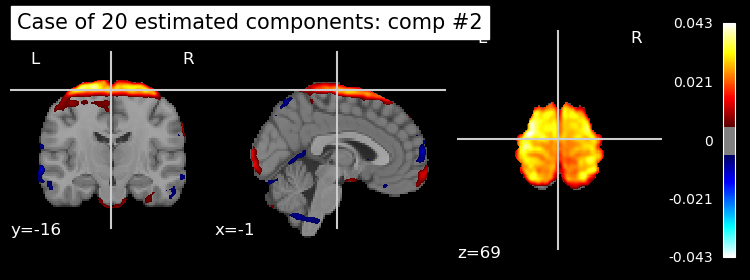

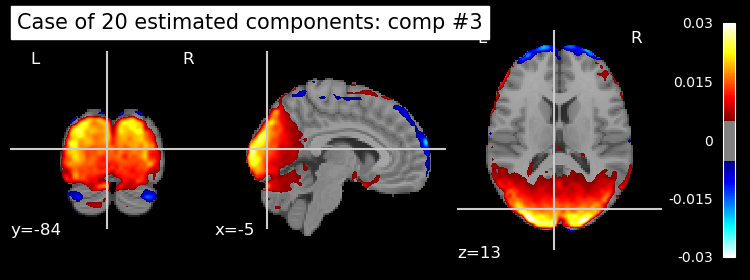

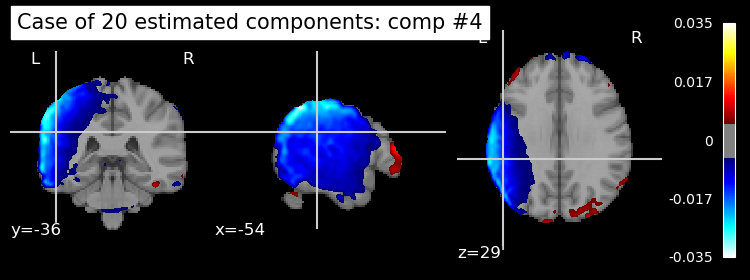

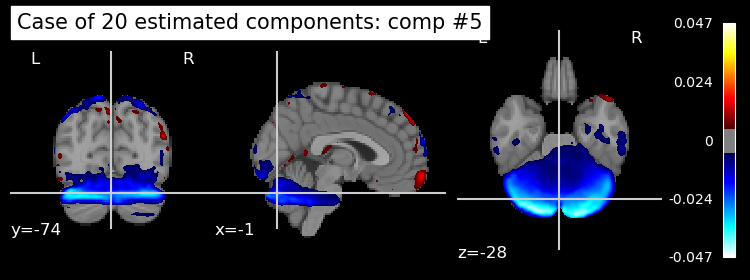

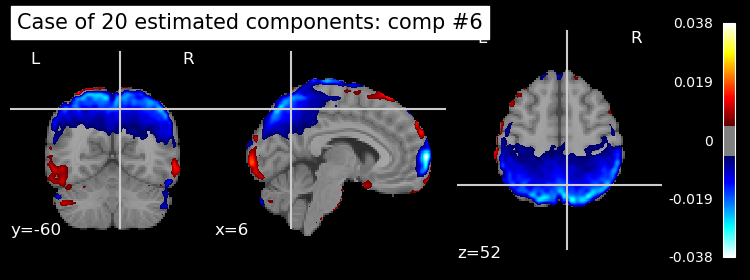

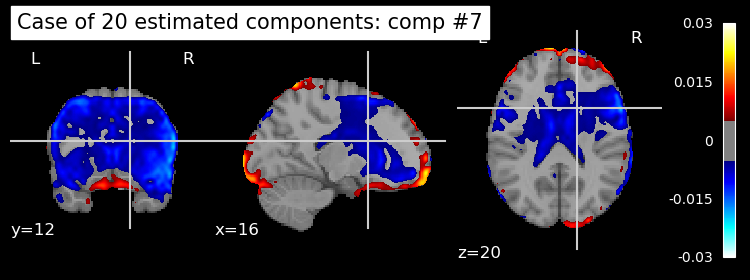

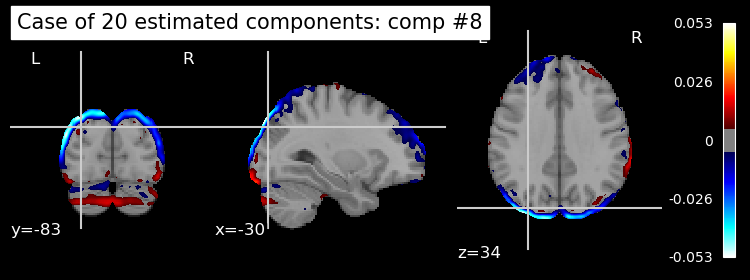

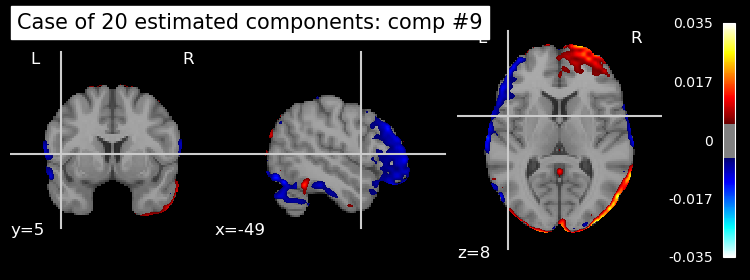

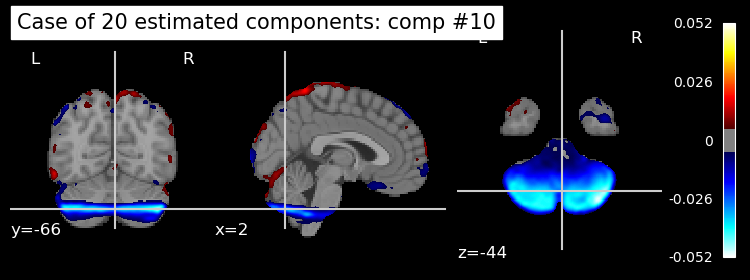

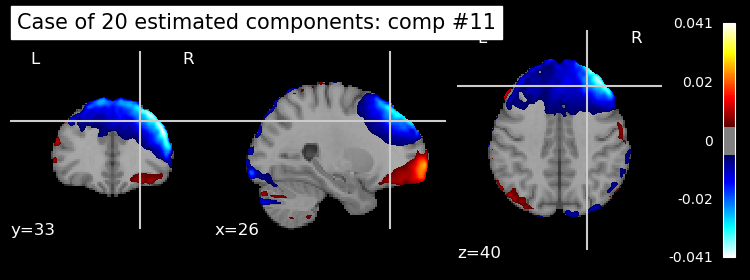

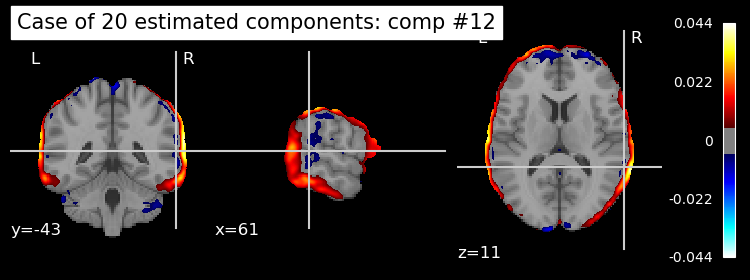

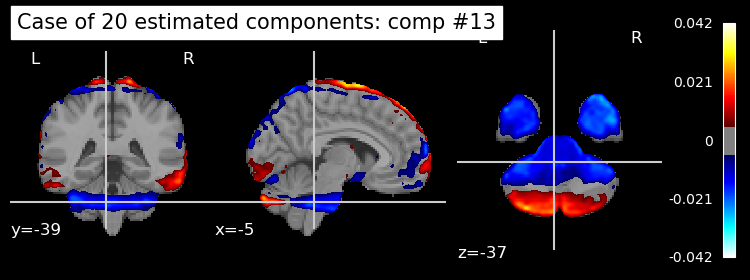

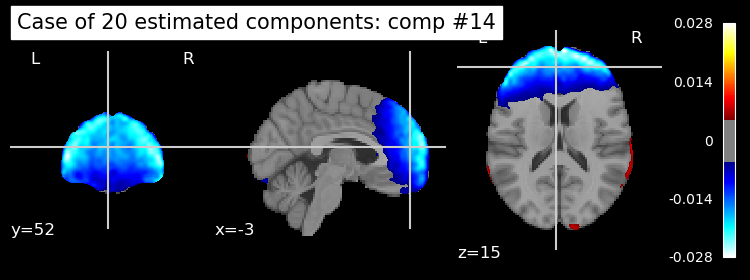

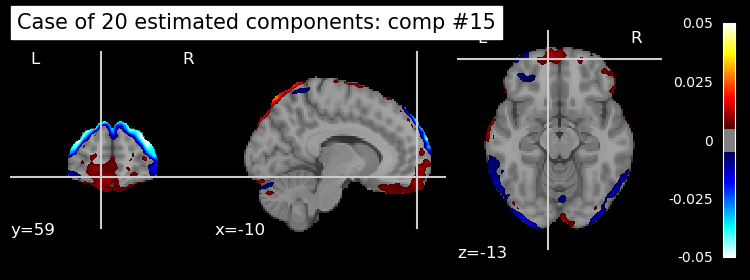

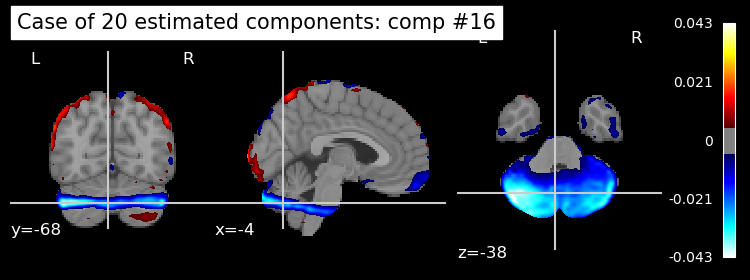

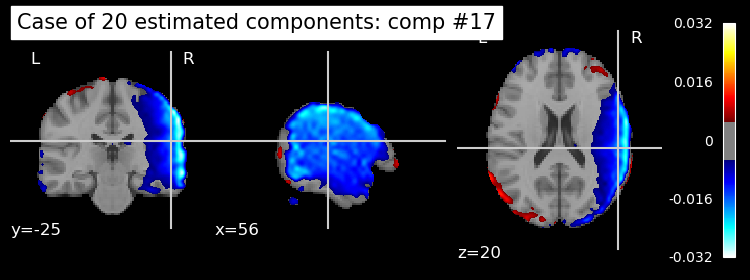

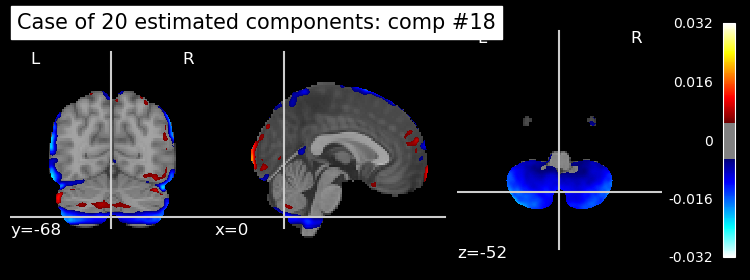

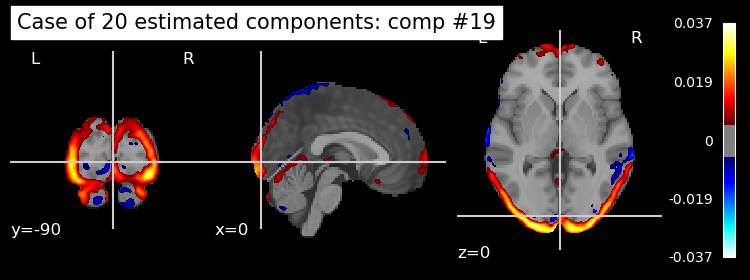

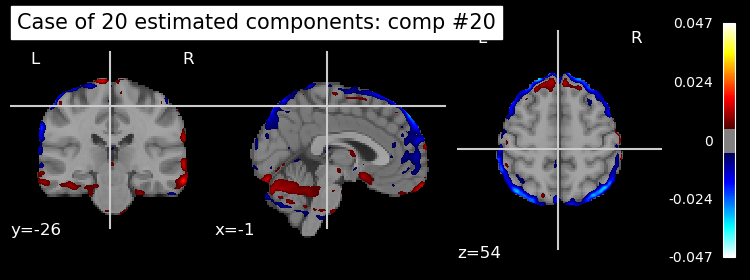

In [51]:
i=0

for n in nb_components:
    S_ = S_dict[n].copy()
    for idx, s in enumerate(S_.T[:min(n, S_.T.shape[0]),:]):
        i = i+1
        s_img = nib.Nifti1Image(np.reshape(s, (x,y,z)), affine)
        data = masker.fit_transform(s_img)
        masked_ = masker.inverse_transform(data) # mask the components
        plot_stat_map(masked_, display_mode="ortho", title='Case of {} estimated components: comp #{}'.format(n,idx+1),
                      colorbar=True, black_bg=True, threshold=2*np.std(s))
                      #output_file=save_results + "ICA_components_{}_n_{}.png".format(idx,n)) # uncomment to save plot
        plt.savefig("ICA_all_participants_ %i" %i)
        plt.show()

# ICA across adults

Only difference to above process is that only relevant data is imported

In [52]:
im_ex = nib.load(func_filenames[0])
affine = nib.load(func_filenames[0]).affine

x, y, z, nb_vol = im_ex.shape

nb_subj = 13

X = np.zeros((nb_vol*nb_subj,x*y*z))

pos1 = 0
pos2 = nb_vol

for i in range(nb_subj):
    
    im = nib.load(func_filenames[i])
    im = im.get_fdata().copy()
    im = im.reshape(-1, nb_vol)

    X[pos1:pos2, :] = im.T
    
    pos1 = pos1 + nb_vol
    pos2 = pos2 + nb_vol
    
X = zscore(X, axis = 1) # across subjects
X = np.nan_to_num(X,0) # nan to 0s

In [53]:
#* Run FastICA on X

S_dict = {}

nb_components =  [5,10,20]

#* We will transpose the matrix X so that ICA algorithm operates on the voxels dimension.
#* In other words, the estimated sources (S) should be have dimensionality [#voxels]

for n in nb_components:
    
    # run PCA as a preprocessing step for ICA with twice the number of components
    n2=2*n
    pca = PCA(n_components=n2)
    H = pca.fit_transform(X.T)  # Reconstruct signals based on orthogonal components
    
    # Reminder: Fast ICA model S = X W
    ica = FastICA(n_components=n, random_state=1, max_iter=200)
    S_ = ica.fit_transform(H)  # Get the estimated sources (S)
    W_ = ica.components_ # Get the estimated un-mixing matrix (W) -- will not be used further on
    S_dict[n] = S_ # store the results in a dictionary


/home/julian/miniconda3/envs/NX-421/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/julian/miniconda3/envs/NX-421/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/julian/miniconda3/envs/NX-421/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


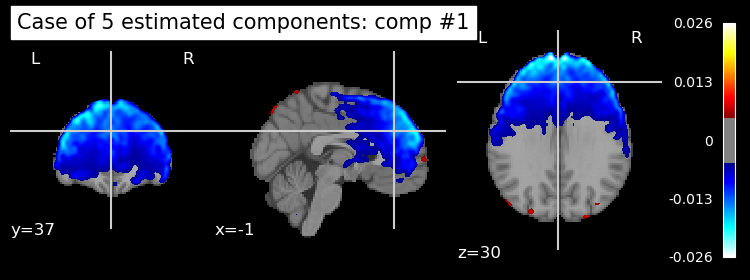

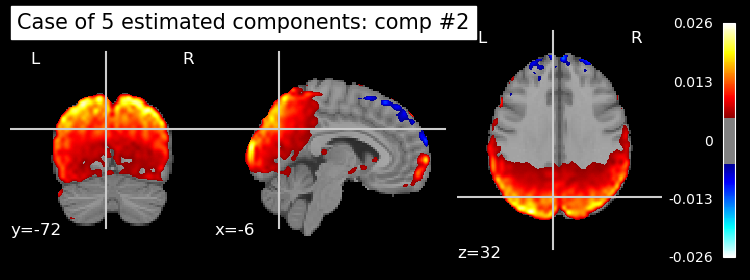

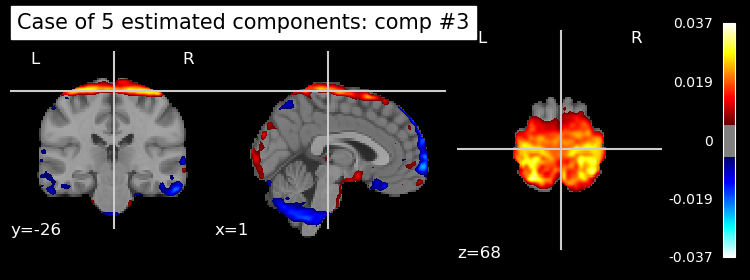

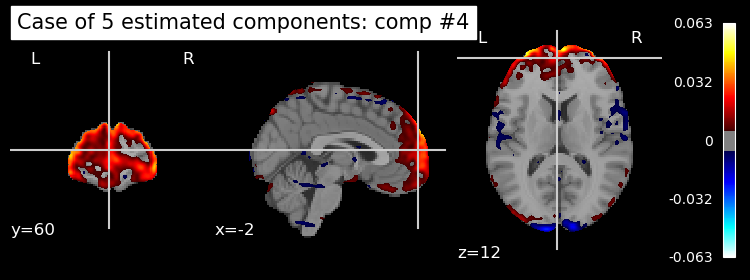

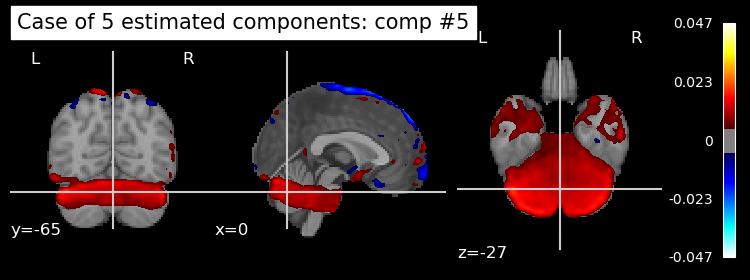

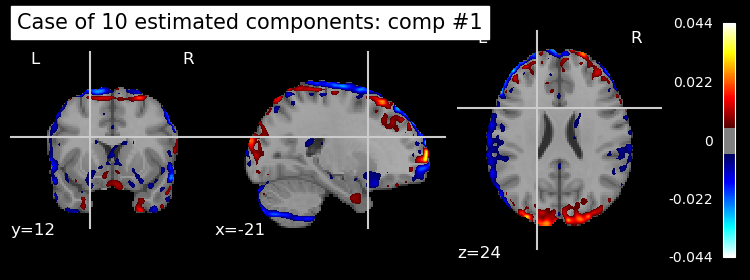

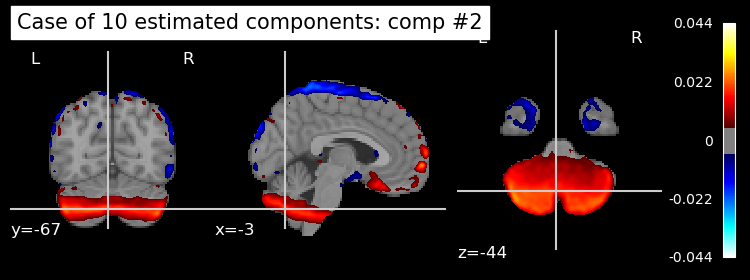

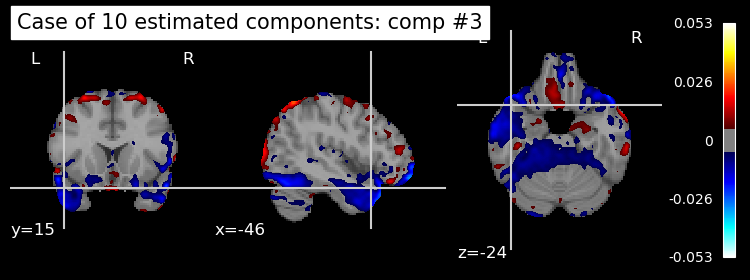

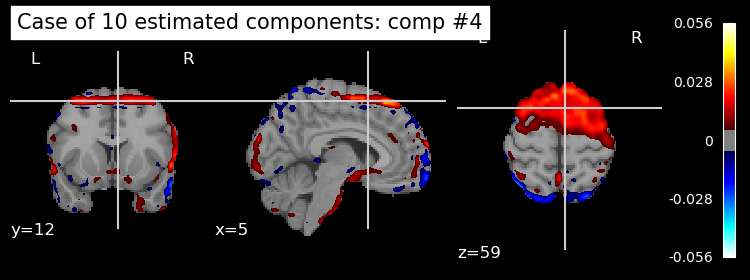

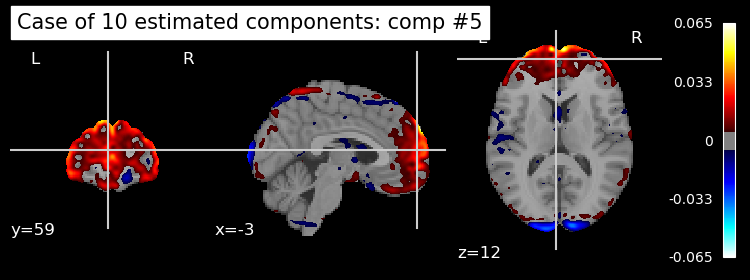

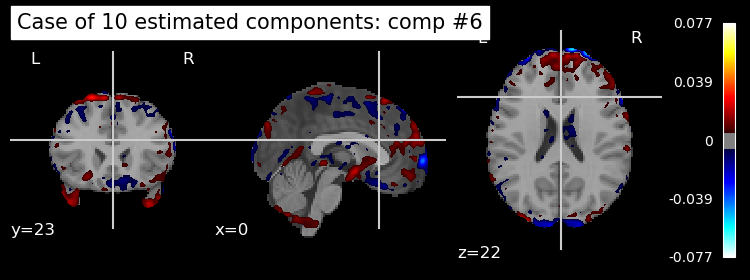

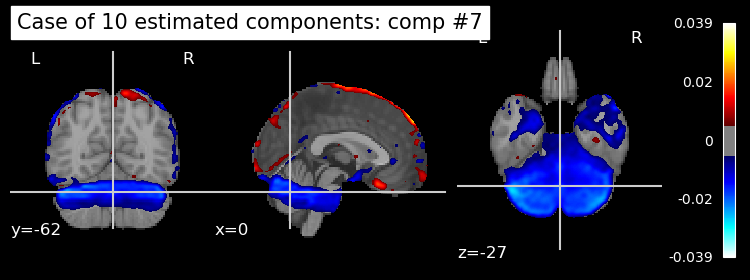

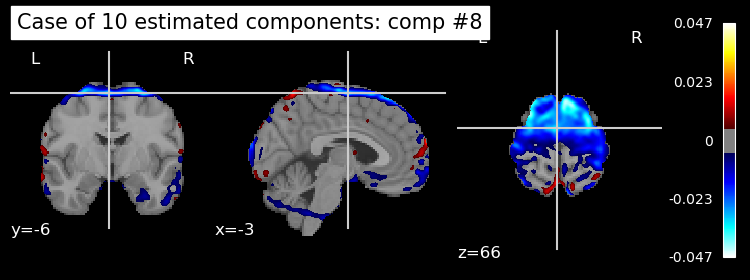

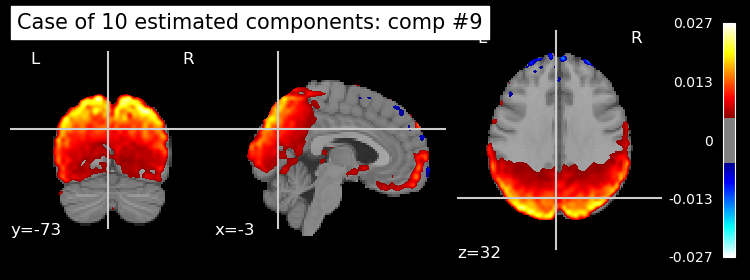

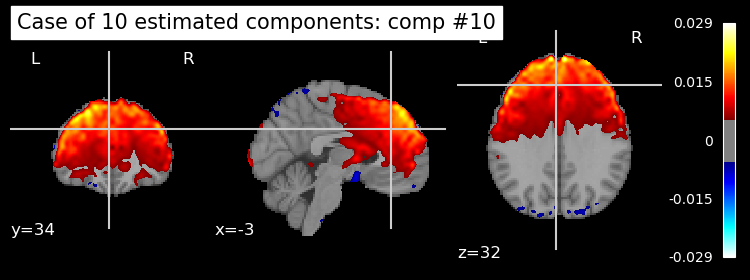

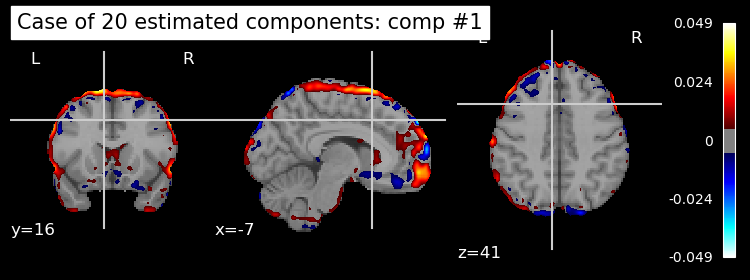

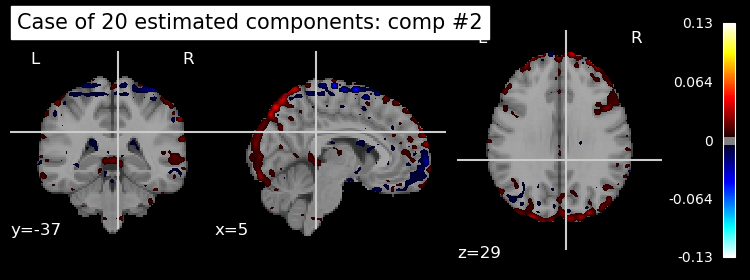

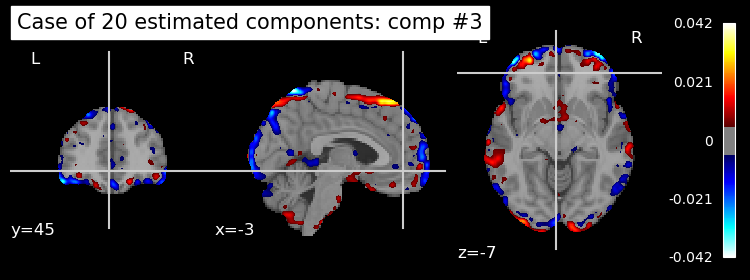

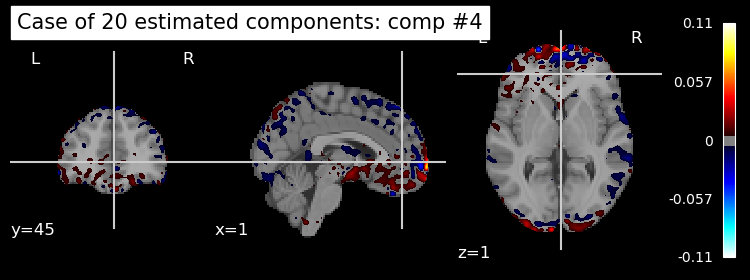

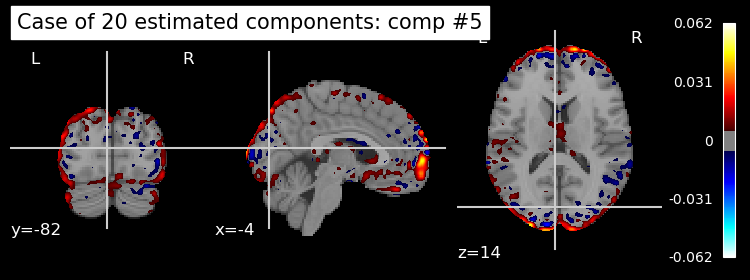

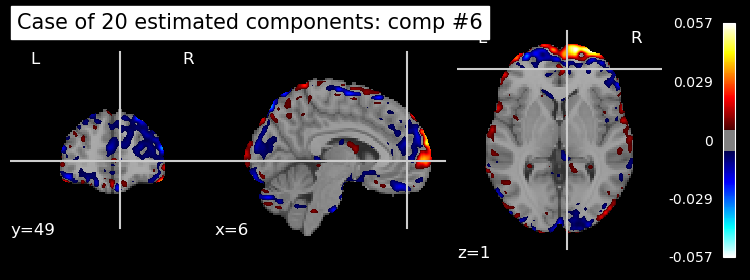

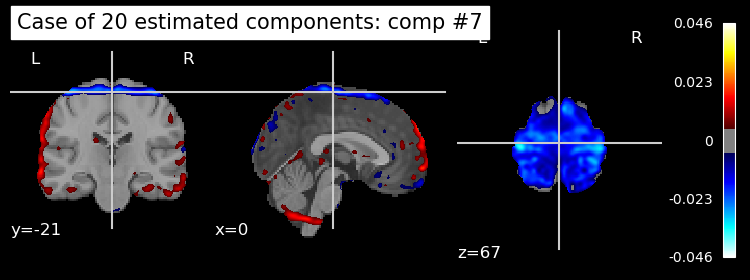

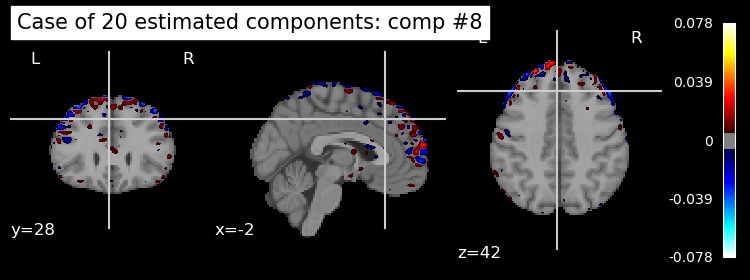

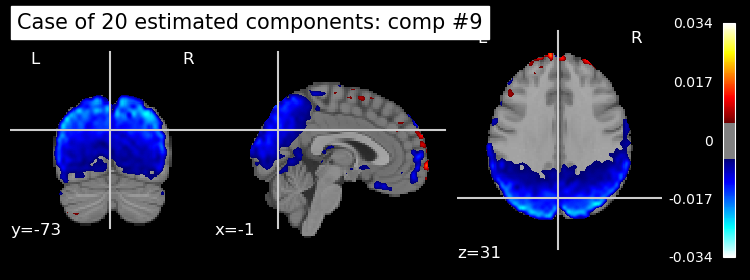

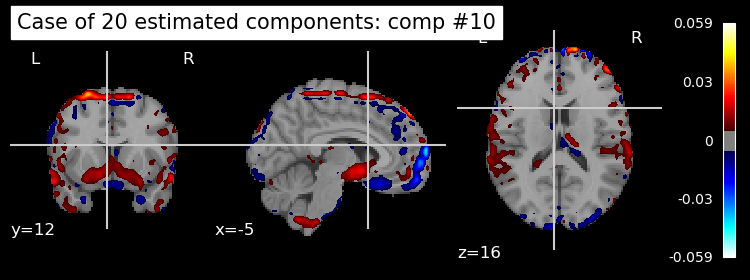

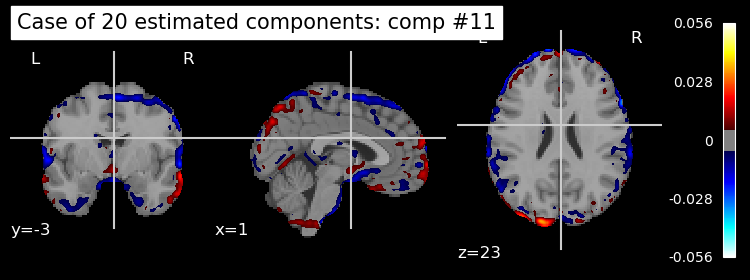

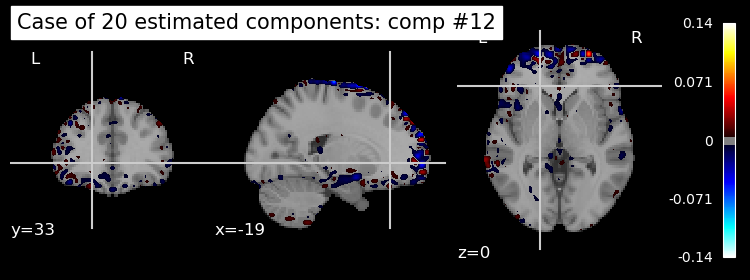

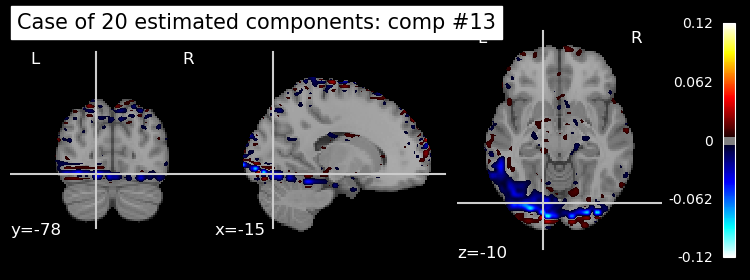

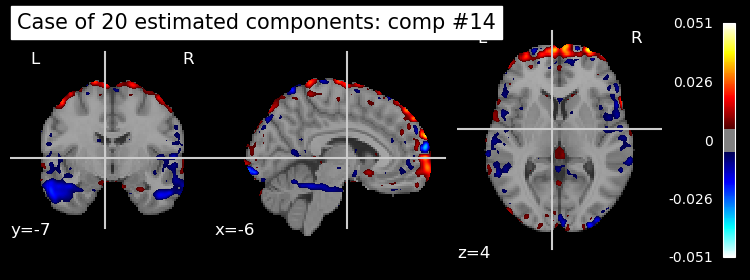

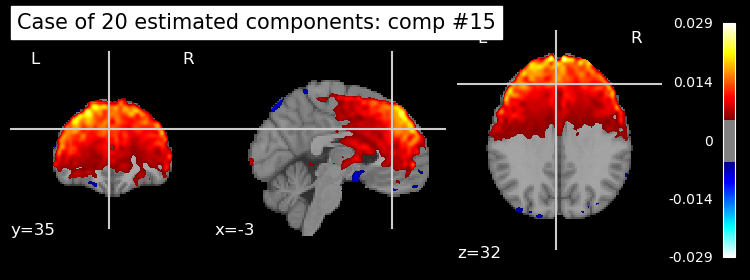

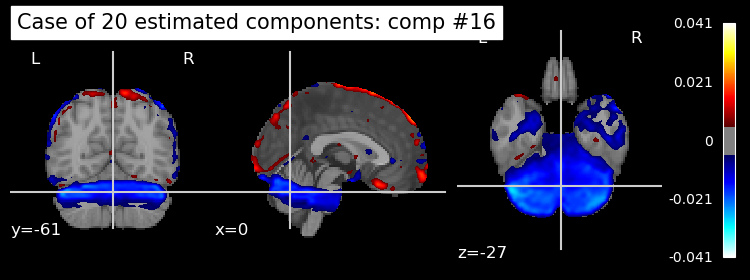

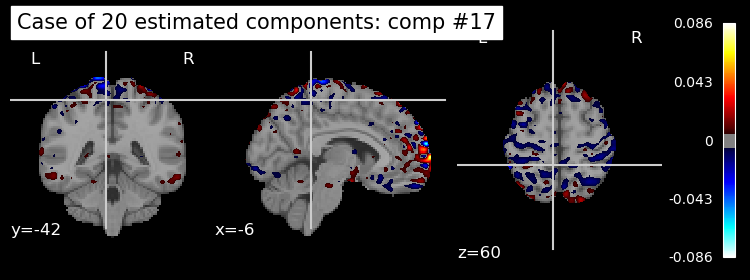

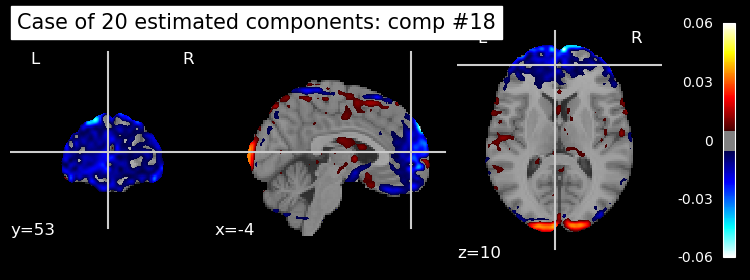

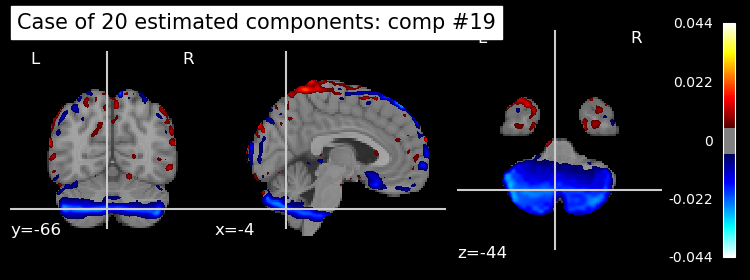

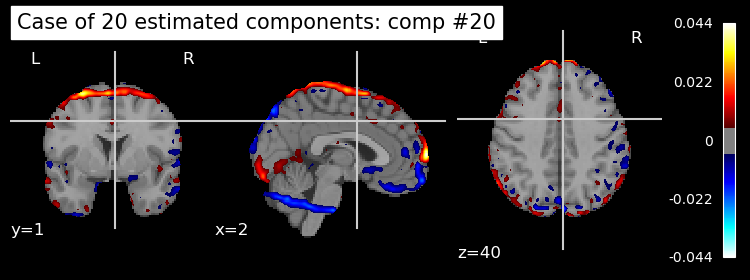

In [54]:
i=0
for n in nb_components:
    S_ = S_dict[n].copy()
    for idx, s in enumerate(S_.T[:min(n, S_.T.shape[0]),:]):
        i=i+1
        s_img = nib.Nifti1Image(np.reshape(s, (x,y,z)), affine)
        data = masker.fit_transform(s_img)
        masked_ = masker.inverse_transform(data) # mask the components
        plot_stat_map(masked_, display_mode="ortho", title='Case of {} estimated components: comp #{}'.format(n,idx+1),
                      colorbar=True, black_bg=True, threshold=2*np.std(s))
                      #output_file=save_results + "ICA_components_{}_n_{}.png".format(idx,n)) # uncomment to save plot
        plt.savefig("ICA_adults %i" %i)        
        plt.show()

# ICA across children

In [55]:
im_ex = nib.load(func_filenames[0])
affine = nib.load(func_filenames[0]).affine

x, y, z, nb_vol = im_ex.shape

nb_subj = 47

X = np.zeros((nb_vol*nb_subj,x*y*z))

pos1 = 0
pos2 = nb_vol

for i in range(nb_subj):
    
    im = nib.load(func_filenames[i+13])
    im = im.get_fdata().copy()
    im = im.reshape(-1, nb_vol)

    X[pos1:pos2, :] = im.T
    
    pos1 = pos1 + nb_vol
    pos2 = pos2 + nb_vol
    
X = zscore(X, axis = 1) # across subjects
X = np.nan_to_num(X,0) # nan to 0s


In [56]:
#* Run FastICA on X

S_dict = {}

nb_components =  [5,10,20]

#* We will transpose the matrix X so that ICA algorithm operates on the voxels dimension.
#* In other words, the estimated sources (S) should be have dimensionality [#voxels]

for n in nb_components:
    
    # run PCA as a preprocessing step for ICA with twice the number of components
    n2=2*n
    pca = PCA(n_components=n2)
    H = pca.fit_transform(X.T)  # Reconstruct signals based on orthogonal components
    
    # Reminder: Fast ICA model S = X W
    ica = FastICA(n_components=n, random_state=1, max_iter=200)
    S_ = ica.fit_transform(H)  # Get the estimated sources (S)
    W_ = ica.components_ # Get the estimated un-mixing matrix (W) -- will not be used further on
    S_dict[n] = S_ # store the results in a dictionary



/home/julian/miniconda3/envs/NX-421/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/julian/miniconda3/envs/NX-421/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/julian/miniconda3/envs/NX-421/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


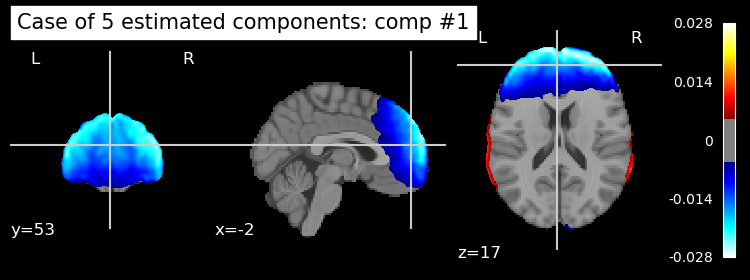

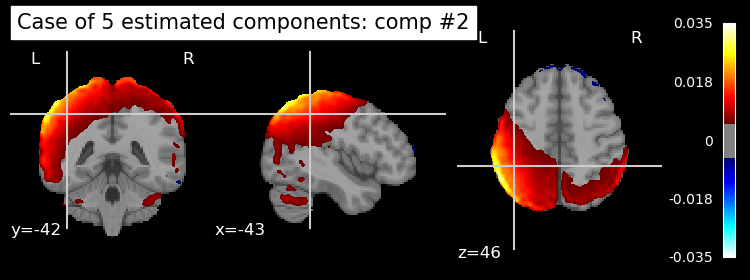

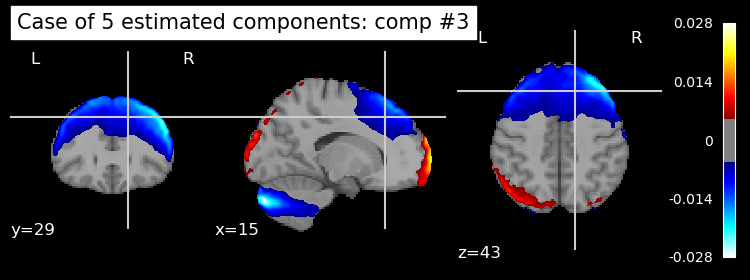

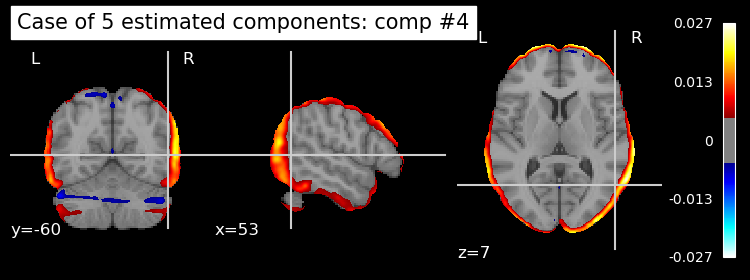

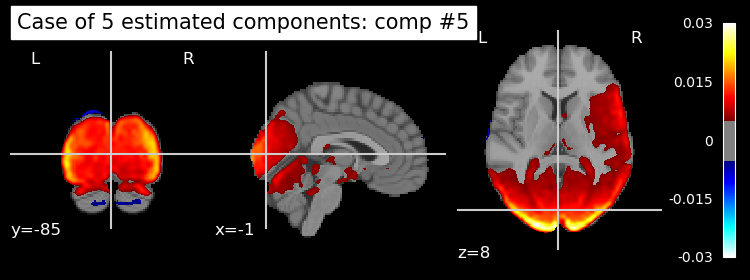

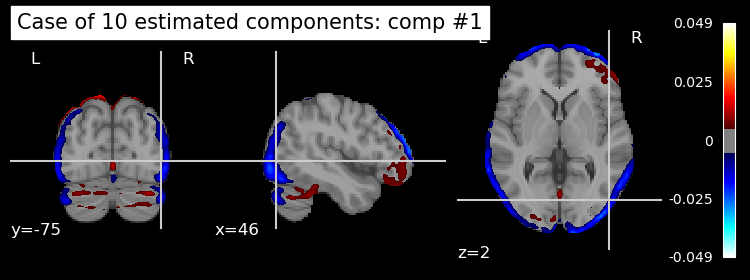

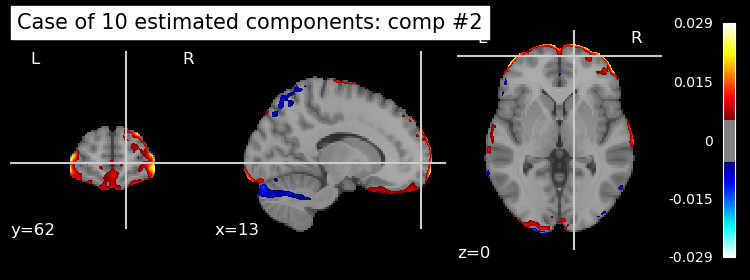

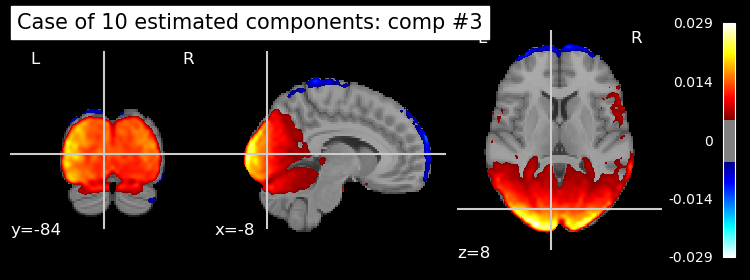

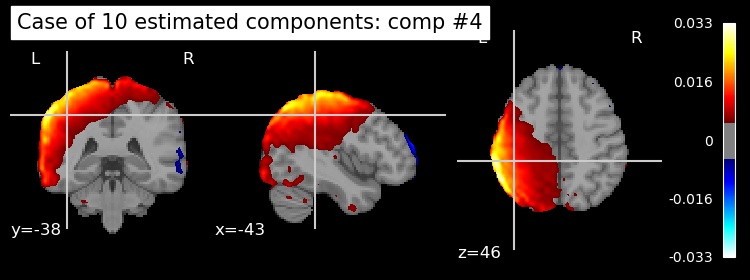

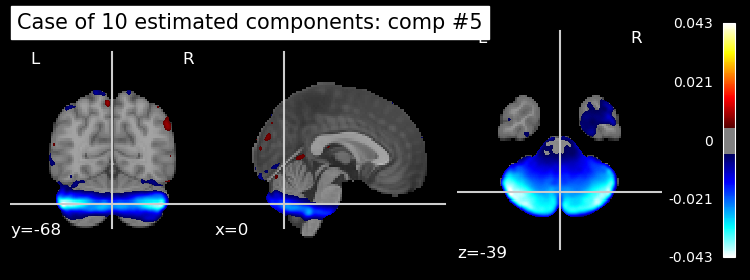

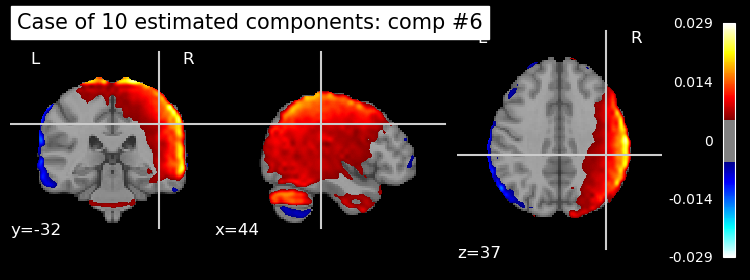

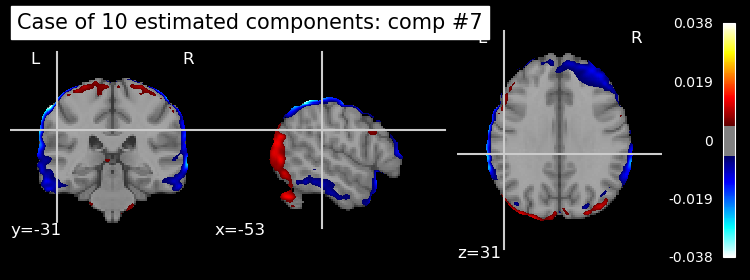

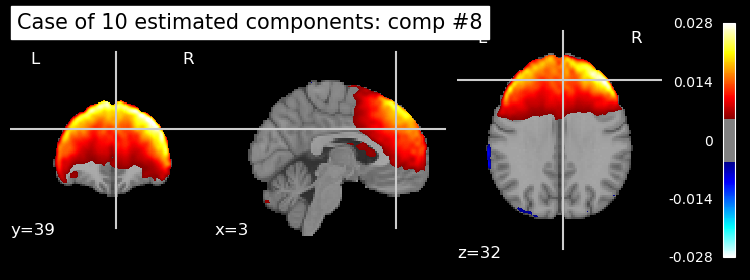

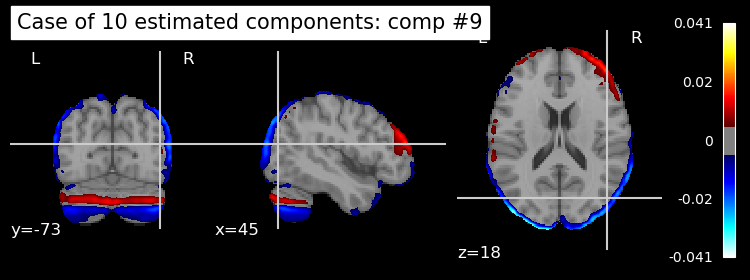

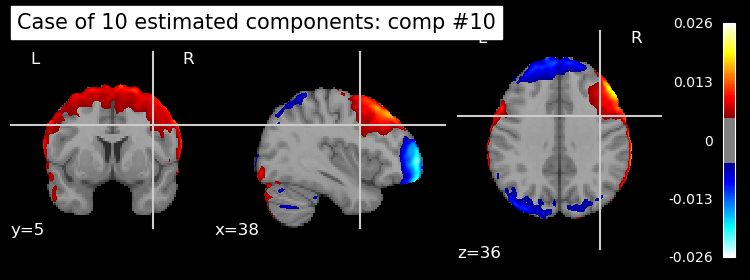

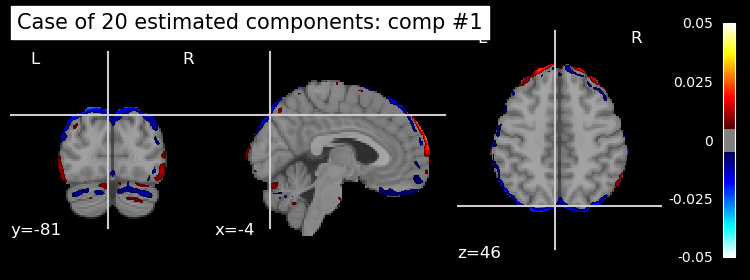

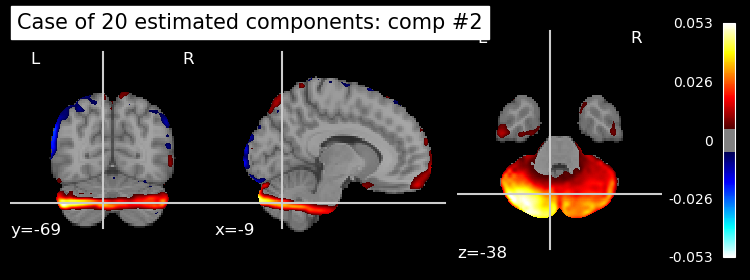

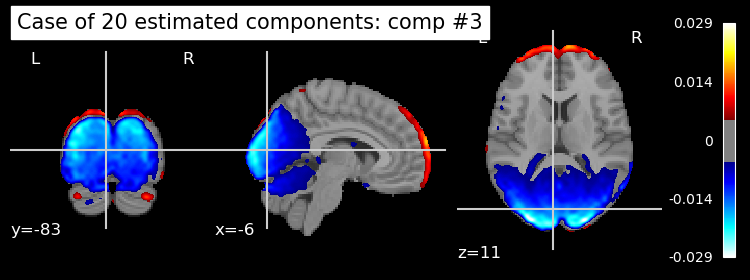

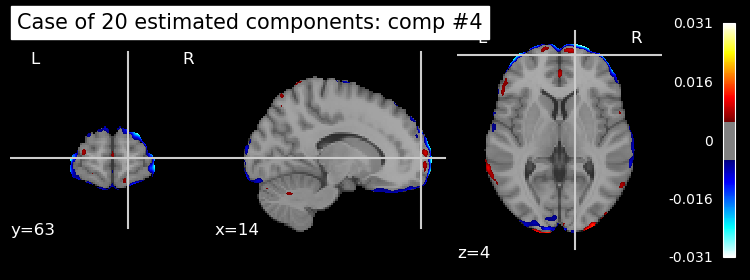

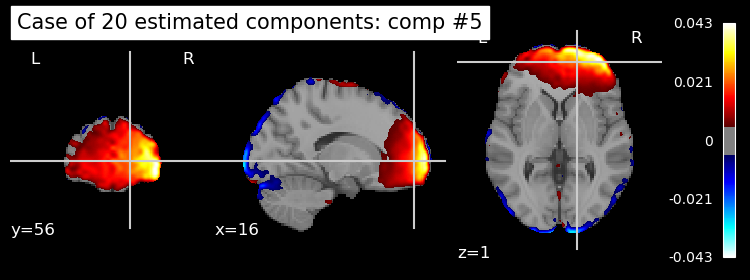

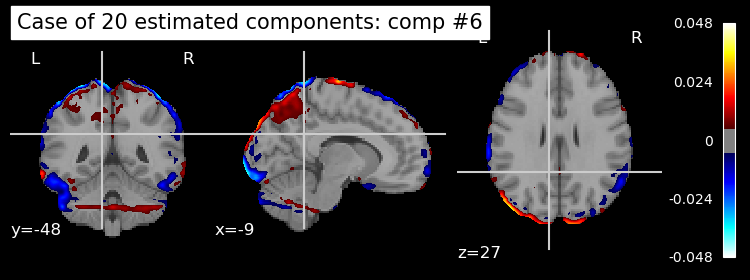

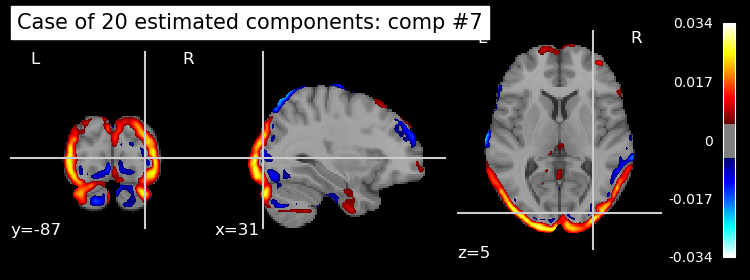

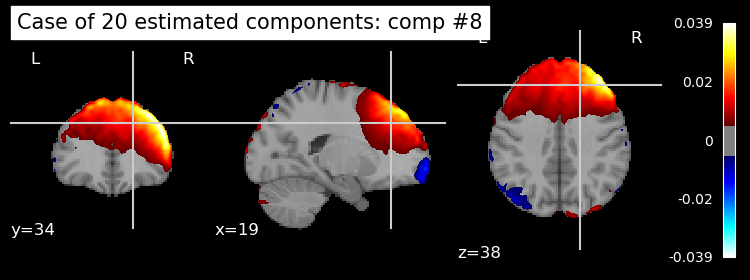

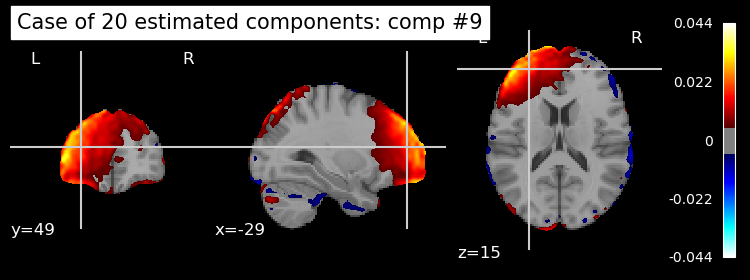

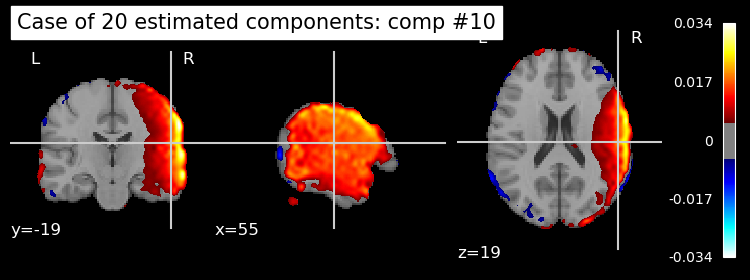

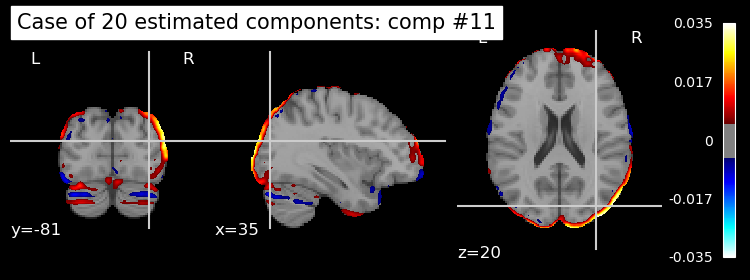

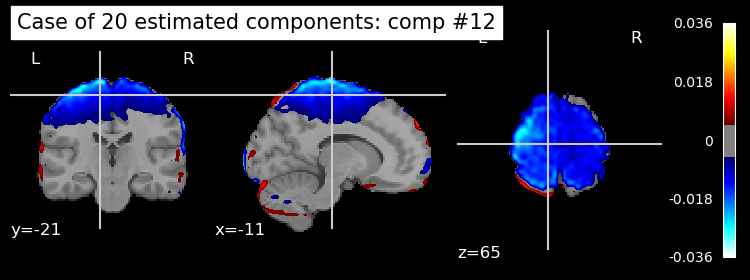

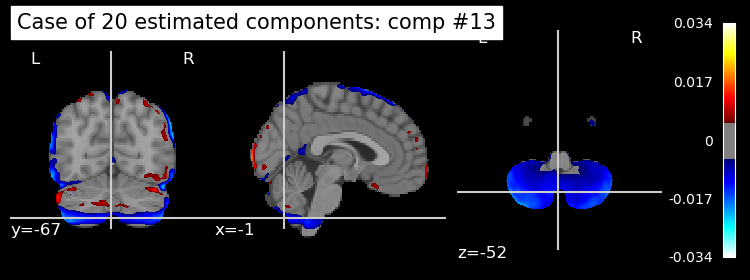

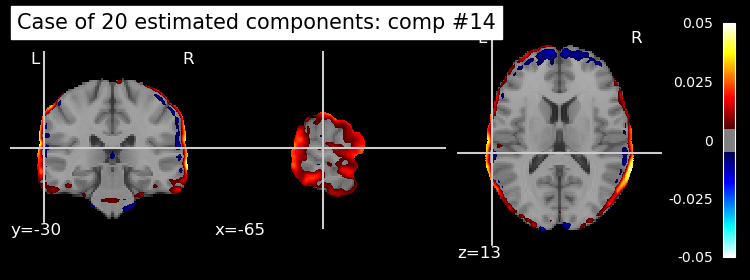

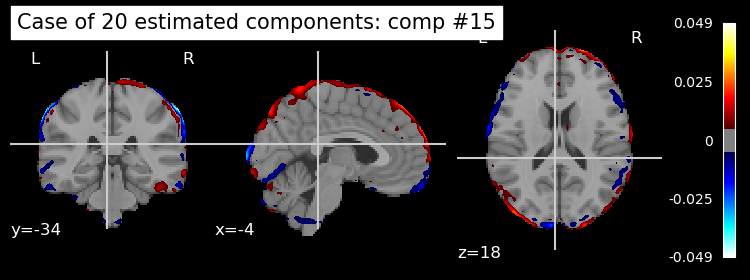

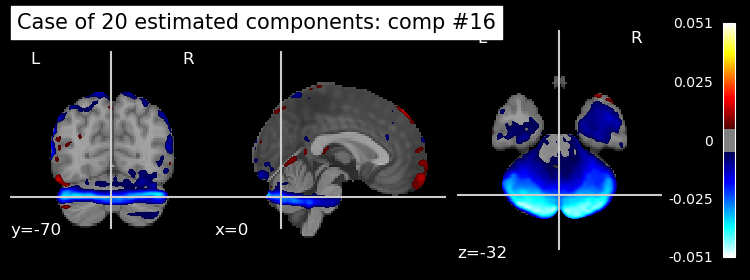

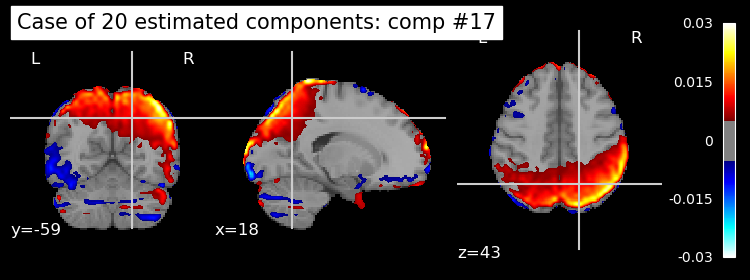

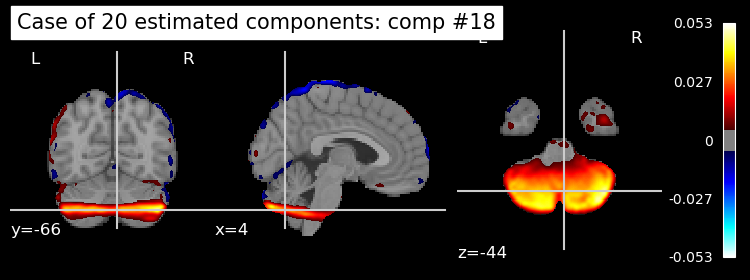

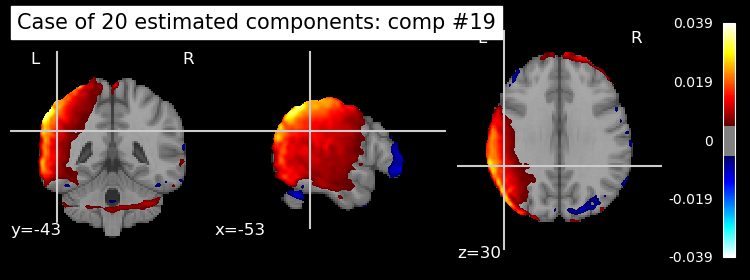

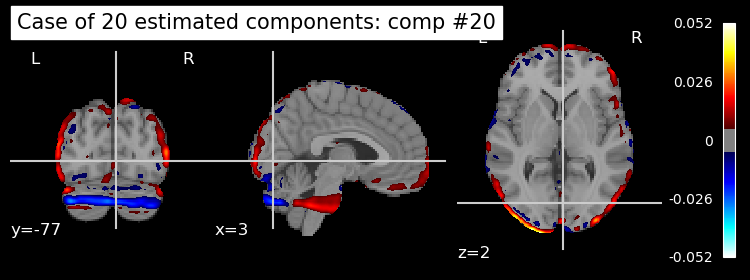

In [58]:
i=0
for n in nb_components:
    S_ = S_dict[n].copy()
    for idx, s in enumerate(S_.T[:min(n, S_.T.shape[0]),:]):
        i=i+1
        s_img = nib.Nifti1Image(np.reshape(s, (x,y,z)), affine)
        data = masker.fit_transform(s_img)
        masked_ = masker.inverse_transform(data) # mask the components
        plot_stat_map(masked_, display_mode="ortho", title='Case of {} estimated components: comp #{}'.format(n,idx+1),
                      colorbar=True, black_bg=True, threshold=2*np.std(s))
                      #output_file=save_results + "ICA_components_{}_n_{}.png".format(idx,n)) # uncomment to save plot
        plt.savefig("ICA_children %i" %i)        
        plt.show()